## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("Resources/bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# View the bitstamp Dataframe 
bitstamp.head()

Open      High       Low      Close  BTC Volume  \
Timestamp                                                                  
2018-01-01 00:00:00  13681.04  13681.04  13637.93  $13646.48    3.334553   
2018-01-01 00:01:00  13646.48  13658.75  13610.18  $13658.75    2.663188   
2018-01-01 00:02:00  13616.93  13616.93  13610.06  $13610.22    0.084653   
2018-01-01 00:03:00  13610.27  13639.09  13610.27  $13639.09    7.182986   
2018-01-01 00:04:00  13635.35  13636.35  13620.00   $13620.0    1.069665   

                       USD Volume  Weighted Price  
Timestamp                                          
2018-01-01 00:00:00  45482.128785    13639.647479  
2018-01-01 00:01:00  36361.390888    13653.332816  
2018-01-01 00:02:00   1152.144036    13610.136247  
2018-01-01 00:03:00  97856.416478    13623.361128  
2018-01-01 00:04:00  14582.660932    13632.923329

### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# View the coinbase Dataframe 
coinbase.head()

Open      High       Low      Close  BTC Volume  \
Timestamp                                                                  
2018-01-01 00:00:00  13620.00  13620.00  13608.49  $13608.49   20.812754   
2018-01-01 00:01:00  13607.14  13607.14  13601.66  $13601.66   13.474359   
2018-01-01 00:02:00  13601.44  13601.44  13580.00   $13580.0   11.536360   
2018-01-01 00:03:00  13587.31  13587.31  13542.70  $13550.34   16.328039   
2018-01-01 00:04:00  13550.34  13585.95  13550.34  $13583.44    9.955364   

                       USD Volume  Weighted Price  
Timestamp                                          
2018-01-01 00:00:00  283451.08537    13619.105106  
2018-01-01 00:01:00  183283.97801    13602.426919  
2018-01-01 00:02:00  156789.19686    13590.872506  
2018-01-01 00:03:00  221413.64182    13560.332806  
2018-01-01 00:04:00  135141.26944    13574.719401

## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.isnull().sum()
bitstamp = bitstamp.fillna('0')
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$","")
bitstamp.head()

/Users/simonabennet/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Open      High       Low     Close BTC Volume  \
Timestamp                                                                
2018-01-01 00:00:00  13681.04  13681.04  13637.93  13646.48   3.334553   
2018-01-01 00:01:00  13646.48  13658.75  13610.18  13658.75   2.663188   
2018-01-01 00:02:00  13616.93  13616.93  13610.06  13610.22   0.084653   
2018-01-01 00:03:00  13610.27  13639.09  13610.27  13639.09   7.182986   
2018-01-01 00:04:00  13635.35  13636.35   13620.0   13620.0   1.069665   

                       USD Volume Weighted Price  
Timestamp                                         
2018-01-01 00:00:00  45482.128785   13639.647479  
2018-01-01 00:01:00  36361.390888   13653.332816  
2018-01-01 00:02:00   1152.144036   13610.136247  
2018-01-01 00:03:00  97856.416478   13623.361128  
2018-01-01 00:04:00  14582.660932   13632.923329

### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.dtypes

Open               object
High               object
Low                object
Close             float64
BTC Volume         object
USD Volume         object
Weighted Price     object
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()
bitstamp = bitstamp.drop_duplicates()
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase.isnull().sum()
coinbase.loc[:,("Open", "High", "Low", "BTC Volume", "USD Volume", "Weighted Price")] = coinbase.loc[:,("Open", "High", "Low", "BTC Volume", "USD Volume", "Weighted Price")].fillna(0)
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [11]:
# Use the str.replace function to remove the dollar sign, $
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$","")
coinbase.head()

/Users/simonabennet/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Open      High       Low     Close  BTC Volume  \
Timestamp                                                                 
2018-01-01 00:00:00  13620.00  13620.00  13608.49  13608.49   20.812754   
2018-01-01 00:01:00  13607.14  13607.14  13601.66  13601.66   13.474359   
2018-01-01 00:02:00  13601.44  13601.44  13580.00   13580.0   11.536360   
2018-01-01 00:03:00  13587.31  13587.31  13542.70  13550.34   16.328039   
2018-01-01 00:04:00  13550.34  13585.95  13550.34  13583.44    9.955364   

                       USD Volume  Weighted Price  
Timestamp                                          
2018-01-01 00:00:00  283451.08537    13619.105106  
2018-01-01 00:01:00  183283.97801    13602.426919  
2018-01-01 00:02:00  156789.19686    13590.872506  
2018-01-01 00:03:00  221413.64182    13560.332806  
2018-01-01 00:04:00  135141.26944    13574.719401

In [12]:
# Convert the Close data type to a float
coinbase.loc[:, "Close"] = coinbase.loc[:,"Close"].astype("float")
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [13]:
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum()
coinbase = coinbase.drop_duplicates()
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [14]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
# Review the first five rows of the DataFrame
columns = [0,3]
bitstamp.iloc[0:5,columns]

Open     Close
Timestamp                              
2018-01-01 00:00:00  13681.04  13646.48
2018-01-01 00:01:00  13646.48  13658.75
2018-01-01 00:02:00  13616.93  13610.22
2018-01-01 00:03:00  13610.27  13639.09
2018-01-01 00:04:00  13635.35  13620.00

In [15]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
# Review the first five rows of the DataFrame
columns = [0,3]
coinbase.iloc[0:5, columns]

Open     Close
Timestamp                              
2018-01-01 00:00:00  13620.00  13608.49
2018-01-01 00:01:00  13607.14  13601.66
2018-01-01 00:02:00  13601.44  13580.00
2018-01-01 00:03:00  13587.31  13550.34
2018-01-01 00:04:00  13550.34  13583.44

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [16]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp.describe(include ='all')

Open      High       Low          Close  BTC Volume  \
count   129068.0  129068.0  129068.0  129067.000000    129068.0   
unique   97986.0   94017.0   94391.0            NaN    128707.0   
top       8400.0    8400.0   10800.0            NaN         1.0   
freq        69.0      97.0      77.0            NaN        39.0   
mean         NaN       NaN       NaN   10459.842453         NaN   
std          NaN       NaN       NaN    2315.976088         NaN   
min          NaN       NaN       NaN    5944.000000         NaN   
25%          NaN       NaN       NaN    8613.370000         NaN   
50%          NaN       NaN       NaN   10145.950000         NaN   
75%          NaN       NaN       NaN   11444.810000         NaN   
max          NaN       NaN       NaN   17234.980000         NaN   

           USD Volume  Weighted Price  
count   129068.000000        129068.0  
unique  129068.000000        128957.0  
top      45482.128785          8400.0  
freq         1.000000            10.0  
mean              NaN             NaN  
std               NaN             NaN  
min               NaN             NaN  
25%               NaN             NaN  
50%               NaN             NaN  
75%               NaN             NaN  
max               NaN             NaN

In [17]:
# Generate the summary statistics for the coinbase DataFrame
coinbase.describe()

Open           High            Low          Close  \
count  129323.000000  129323.000000  129323.000000  129322.000000   
mean    10449.132385   10456.037661   10441.791505   10449.140958   
std      2317.367867    2317.883801    2316.743603    2317.197419   
min         0.000000       0.000000       0.000000    5882.310000   
25%      8609.210000    8613.870000    8603.495000    8609.230000   
50%     10137.380000   10145.880000   10127.870000   10137.440000   
75%     11397.515000   11400.000000   11390.000000   11397.237500   
max     17178.000000   17178.000000   17177.990000   17177.990000   

          BTC Volume    USD Volume  Weighted Price  
count  129323.000000  1.293230e+05   129323.000000  
mean       15.666435  1.572552e+05    10448.883332  
std        27.481575  2.667872e+05     2317.340347  
min         0.000000  0.000000e+00        0.000000  
25%         2.999069  3.071205e+04     8609.113238  
50%         7.092543  7.461146e+04    10136.032785  
75%        16.954254  1.754525e+05    11396.968282  
max       959.084903  1.152334e+07    17177.995495

<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp'>

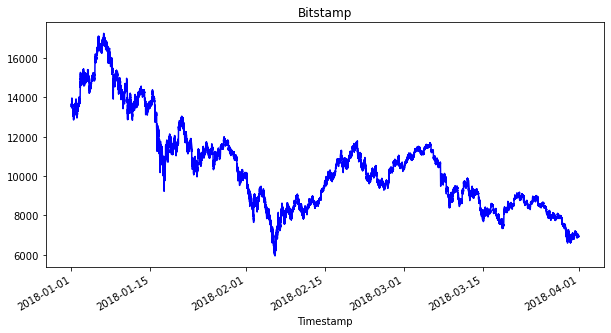

In [18]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp["Close"].plot(figsize = (10,5), title = "Bitstamp", color = "blue")

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

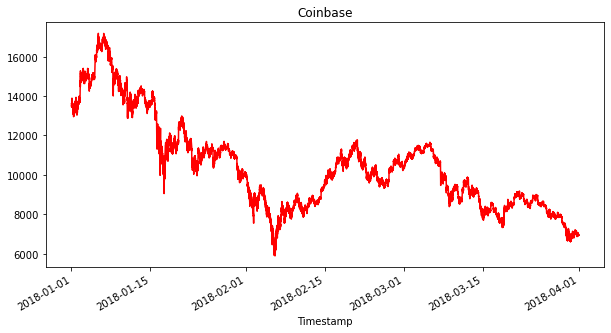

In [ ]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase["Close"].plot(figsize = (10,5), title = "Coinbase", color = "red")


<AxesSubplot:title={'center':'Bitstamp v Coinbase'}, xlabel='Timestamp'>

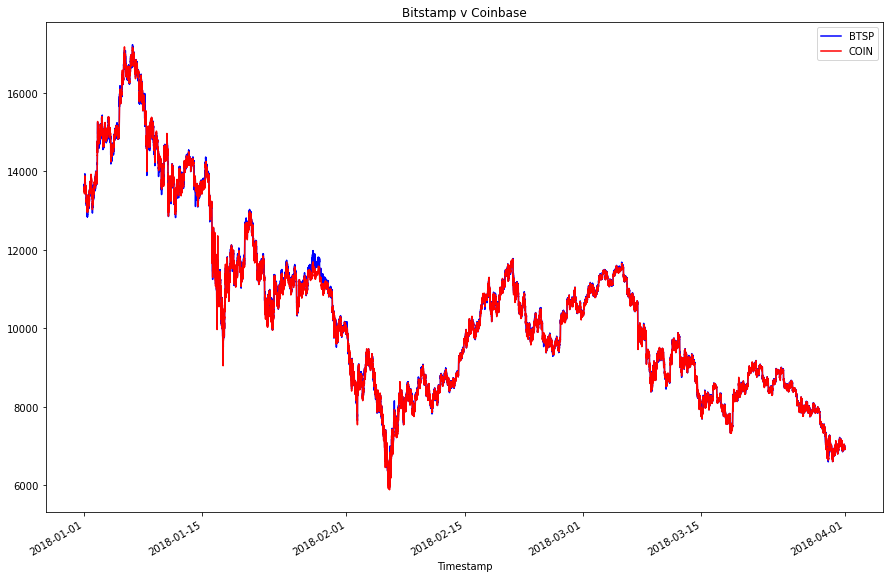

In [ ]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp["Close"].plot(legend = True, figsize = (15,10), title = "Bitstamp v Coinbase", color = "blue", label = "BTSP")
coinbase["Close"].plot(legend = True, figsize = (15,10), color = "red", label = "COIN")


<AxesSubplot:title={'center':'January 2018'}, xlabel='Timestamp'>

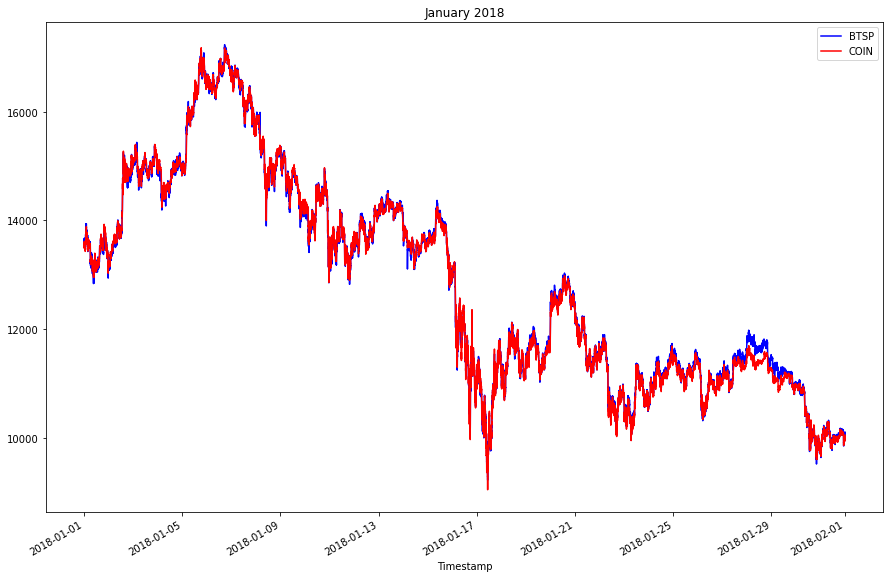

In [21]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp["Close"].loc['2018-1-1' : '2018-1-31'].plot(
    legend = True, figsize=(15,10), title = "January 2018", color = "blue", label = "BTSP")
coinbase["Close"].loc['2018-1-1' : '2018-1-31'].plot(
    legend = True, figsize=(15,10), color = "red", label = "COIN")

<AxesSubplot:title={'center':'February 2018'}, xlabel='Timestamp'>

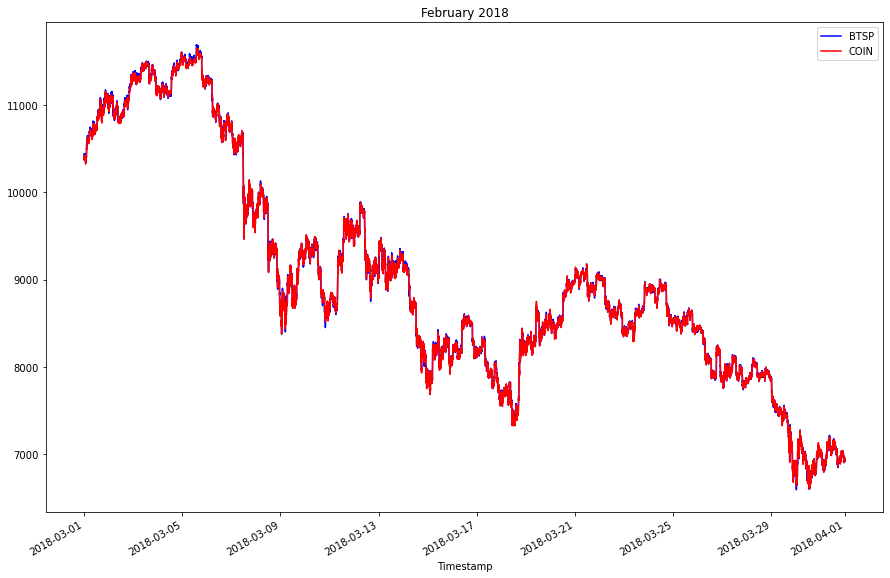

In [22]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp["Close"].loc['2018-3-1' : '2018-3-31'].plot(
    legend = True, figsize=(15,10), title = "February 2018", color = "blue", label = "BTSP")
coinbase["Close"].loc['2018-3-1' : '2018-3-31'].plot(
    legend = True, figsize=(15,10), color = "red", label = "COIN")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'January 1 2018'}, xlabel='Timestamp'>

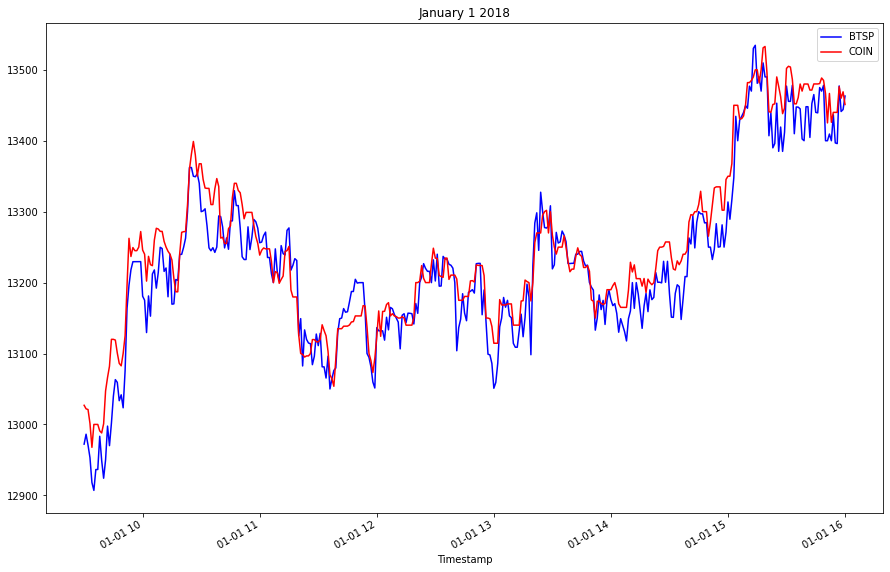

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp["Close"].loc['2018-1-1 09:30' : '2018-1-1 16:00'].plot(
    legend = True, figsize=(15,10), title = "January 1 2018", color = "blue", label = "BTSP")
coinbase["Close"].loc['2018-1-1 09:30' : '2018-1-1 16:00'].plot(
    legend = True, figsize=(15,10), color = "red", label = "COIN")

In [24]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase["Close"].loc['2018-1-1 12'] - bitstamp["Close"].loc['2018-1-1 12']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count     60.000000
mean      10.954167
std       25.251936
min      -29.550000
25%       -7.150000
50%        5.675000
75%       26.695000
max      101.140000
Name: Close, dtype: float64

<AxesSubplot:>

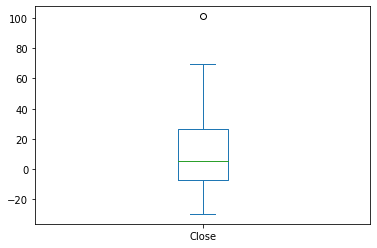

In [25]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

<AxesSubplot:title={'center':'February 1 2018'}, xlabel='Timestamp'>

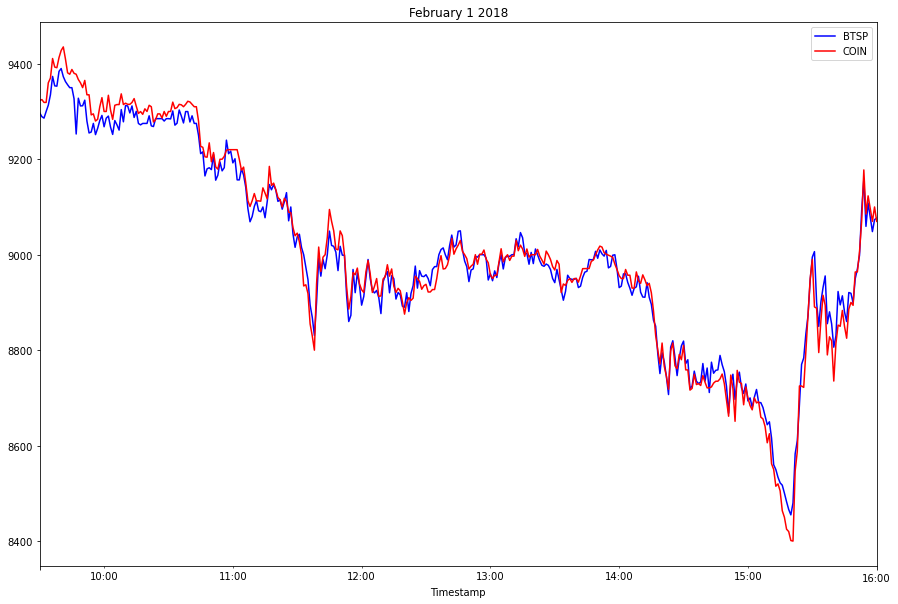

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp["Close"].loc['2018-2-1 09:30' : '2018-2-1 16:00'].plot(
    legend = True, figsize=(15,10), title = "February 1 2018", color = "blue", label = "BTSP")
coinbase["Close"].loc['2018-2-1 09:30' : '2018-2-1 16:00'].plot(
    legend = True, figsize=(15,10), color = "red", label = "COIN")

In [27]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase["Close"].loc['2018-2-1 10'] - bitstamp["Close"].loc['2018-2-1 10']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    60.000000
mean     21.866833
std      14.427111
min     -21.000000
25%      10.440000
50%      21.795000
75%      32.730000
max      53.510000
Name: Close, dtype: float64

<AxesSubplot:>

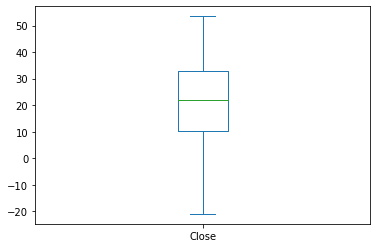

In [28]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'March 1 2018'}, xlabel='Timestamp'>

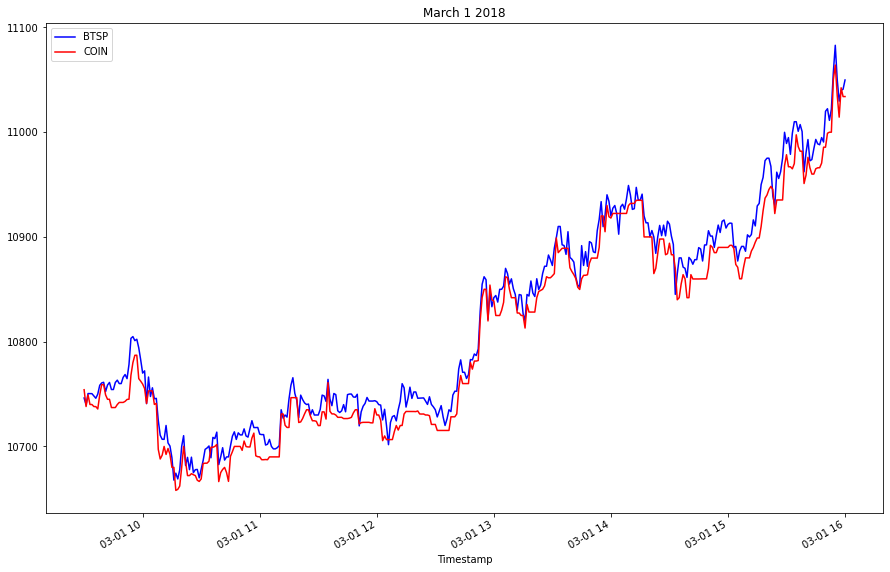

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp["Close"].loc['2018-3-1 09:30' : '2018-3-1 16:00'].plot(
    legend = True, figsize=(15,10), title = "March 1 2018", color = "blue", label = "BTSP")
coinbase["Close"].loc['2018-3-1 09:30' : '2018-3-1 16:00'].plot(
    legend = True, figsize=(15,10), color = "red", label = "COIN")

In [30]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase["Close"].loc['2018-3-1 14'] - bitstamp["Close"].loc['2018-3-1 14']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    60.000000
mean    -13.842167
std      12.631566
min     -38.440000
25%     -19.550000
50%     -14.030000
75%      -6.262500
max      24.850000
Name: Close, dtype: float64

<AxesSubplot:>

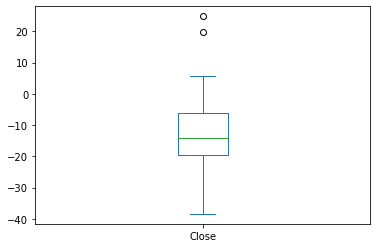

In [31]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [32]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase["Close"].loc['2018-1-1'] - bitstamp["Close"].loc['2018-1-1']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early > 0].describe()

count    782.000000
mean      38.672634
std       31.451187
min        0.010000
25%       15.950000
50%       32.610000
75%       53.627500
max      319.990000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [33]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / bitstamp["Close"].loc['2018-1-1']

# Review the spread return DataFrame
spread_return_early.describe()

count    7.820000e+02
mean     2.909132e-03
std      2.400203e-03
min      7.246377e-07
25%      1.187666e-03
50%      2.460052e-03
75%      4.021934e-03
max      2.461649e-02
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [34]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-01 09:10:00    0.011455
2018-01-01 23:25:00    0.022465
2018-01-01 23:26:00    0.024616
2018-01-01 23:27:00    0.015948
2018-01-01 23:28:00    0.011261
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [35]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    7.000000
mean     0.015453
std      0.005833
min      0.010427
25%      0.011358
50%      0.012001
75%      0.019207
max      0.024616
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [43]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp["Close"].loc['2018-1-1']


# Drop any missing values from the profit DataFrame
profit_early.dropna(inplace=True)

# View the early profit DataFrame
profit_early

Timestamp
2018-01-01 09:10:00    147.33
2018-01-01 23:25:00    293.89
2018-01-01 23:26:00    319.99
2018-01-01 23:27:00    207.33
2018-01-01 23:28:00    146.82
2018-01-01 23:29:00    155.86
2018-01-01 23:31:00    135.18
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [46]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_early.describe()

count      7.000000
mean     200.914286
std       76.390469
min      135.180000
25%      147.075000
50%      155.860000
75%      250.610000
max      319.990000
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

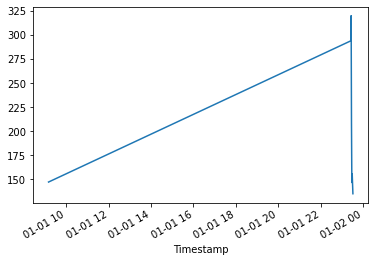

In [47]:
# Plot the results for the early profit per trade DataFrame
profit_early.plot()

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [48]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum = profit_early.sum()
profit_sum

1406.3999999999996

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [50]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_early.cumsum()
cumulative_profit_early

Timestamp
2018-01-01 09:10:00     147.33
2018-01-01 23:25:00     441.22
2018-01-01 23:26:00     761.21
2018-01-01 23:27:00     968.54
2018-01-01 23:28:00    1115.36
2018-01-01 23:29:00    1271.22
2018-01-01 23:31:00    1406.40
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

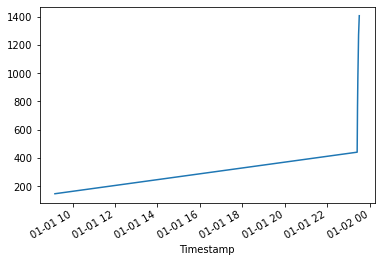

In [51]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot()

In [ ]:
**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE